In [ ]:
!pip install yfinance --quiet
import yfinance as yf

import pandas as pd

In [ ]:
reli=yf.Ticker("RELIANCE.NS").history('10y')

In [ ]:
reli.to_csv('reli.csv')

In [ ]:
df = pd.read_csv('reli.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-02-15,390.542797,391.251469,380.872947,382.518890,14500796,0.0,0.0
1,2012-02-16,379.935664,379.935664,367.911228,371.454559,12805396,0.0,0.0
2,2012-02-17,375.843694,377.832551,370.425848,374.083466,16578320,0.0,0.0
3,2012-02-21,373.763374,388.050984,372.666097,385.673523,16825319,0.0,0.0
4,2012-02-22,387.708115,392.005810,379.524175,381.032959,11605231,0.0,0.0
...,...,...,...,...,...,...,...,...
2460,2022-02-09,2371.149902,2387.199951,2358.000000,2383.500000,5300891,0.0,0.0
2461,2022-02-10,2395.699951,2395.699951,2365.100098,2381.050049,5752361,0.0,0.0
2462,2022-02-11,2373.250000,2384.500000,2344.100098,2376.399902,7357863,0.0,0.0
2463,2022-02-14,2340.250000,2354.949951,2313.000000,2338.550049,4947109,0.0,0.0


In [ ]:
df1=df.reset_index()['Close']
df1

0        382.518890
1        371.454559
2        374.083466
3        385.673523
4        381.032959
           ...     
2460    2383.500000
2461    2381.050049
2462    2376.399902
2463    2338.550049
2464    2417.949951
Name: Close, Length: 2465, dtype: float64

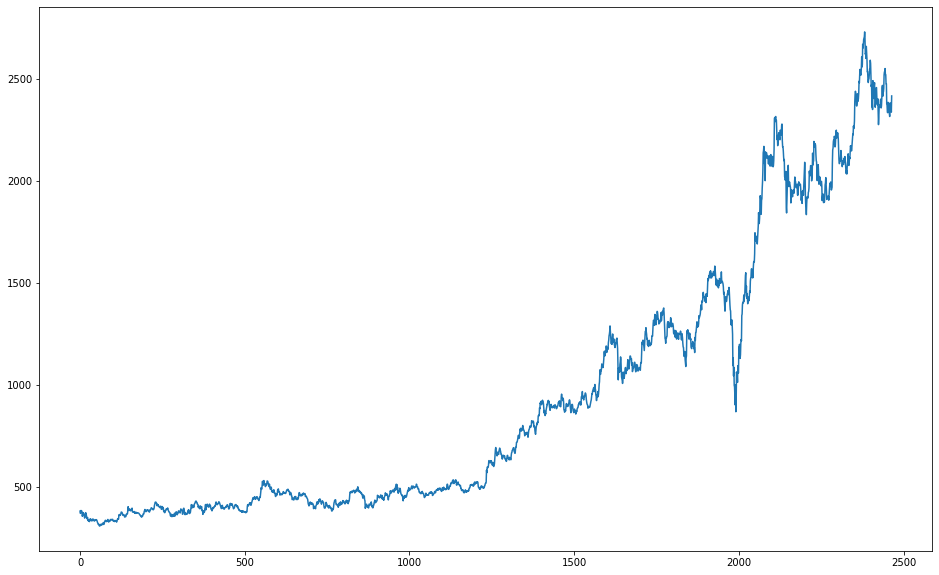

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df1)

In [ ]:
import numpy as np
df1

0        382.518890
1        371.454559
2        374.083466
3        385.673523
4        381.032959
           ...     
2460    2383.500000
2461    2381.050049
2462    2376.399902
2463    2338.550049
2464    2417.949951
Name: Close, Length: 2465, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.03029798]
 [0.02573111]
 [0.02681621]
 ...
 [0.85328558]
 [0.8376628 ]
 [0.87043564]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

print(len(train_data))
print(len(test_data))

1602
863


In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1551, 50)
(1551,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(812, 50)
(812,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(50,return_sequences=True))   
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, None, 50)          10400     
                                                                 
 lstm_19 (LSTM)              (None, None, 50)          20200     
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/10
25/25 [==============================] - 11s 236ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 2/10
25/25 [==============================] - 5s 198ms/step - loss: 1.6319e-04 - val_loss: 0.0021
Epoch 3/10
25/25 [==============================] - 5s 213ms/step - loss: 1.1914e-04 - val_loss: 0.0022
Epoch 4/10
25/25 [==============================] - 5s 194ms/step - loss: 1.1302e-04 - val_loss: 0.0019
Epoch 5/10
25/25 [==============================] - 5s 187ms/step - loss: 1.1239e-04 - val_loss: 0.0020
Epoch 6/10
25/25 [==============================] - 5s 186ms/step - loss: 1.1537e-04 - val_loss: 0.0017
Epoch 7/10
25/25 [==============================] - 4s 178ms/step - loss: 1.1952e-04 - val_loss: 0.0017
Epoch 8/10
25/25 [==============================] - 3s 121ms/step - loss: 1.1038e-04 - val_loss: 0.0018
Epoch 9/10
25/25 [==============================] - 3s 101ms/step - loss: 9.7744e-05 - val_loss: 0.0015
Epoch 10/10
25/25 [==============================] - 2s 96ms/step -

In [ ]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

566.2720629221999

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1883.7869944948466

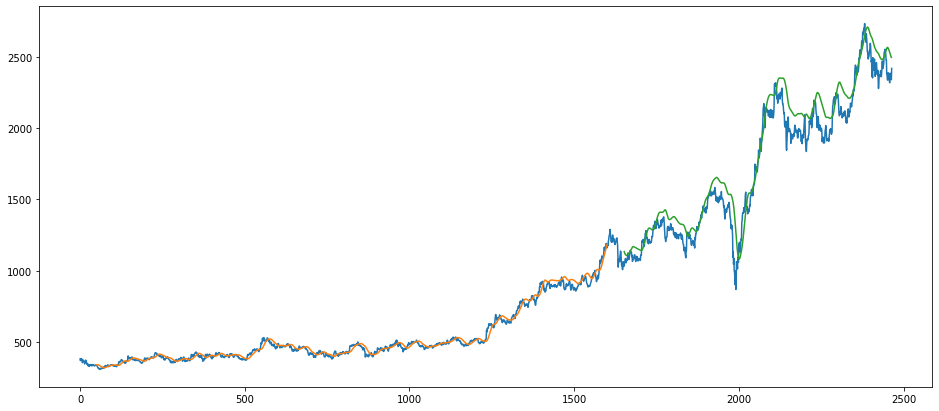

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(16,7))
ax.plot(scaler.inverse_transform(df1))
ax.plot(trainPredictPlot)
ax.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

863

In [ ]:
test_data[341]

array([0.49922257])

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 522)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
#temp_input
# temp_input[:100]
len(temp_input)

522

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=522
i=1
while(i<30):
    
    if(len(temp_input)>522):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, -1,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #t(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(np.array(lst_output).shape)

(29, 1)


In [ ]:
x_input = x_input[0]
x_input.shape

(522, 1)

In [ ]:
day_new=np.arange(1,523)
day_pred=np.arange(523,523+29)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(day_pred)
#len(test_data)
#len(scaler.inverse_transform(lst_output))

29

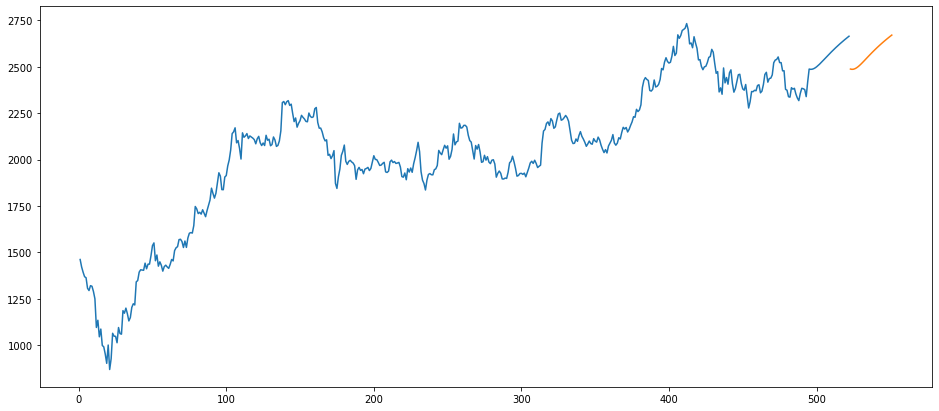

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))
ax.plot(day_new,scaler.inverse_transform(x_input))
ax.plot(day_pred,scaler.inverse_transform(lst_output))

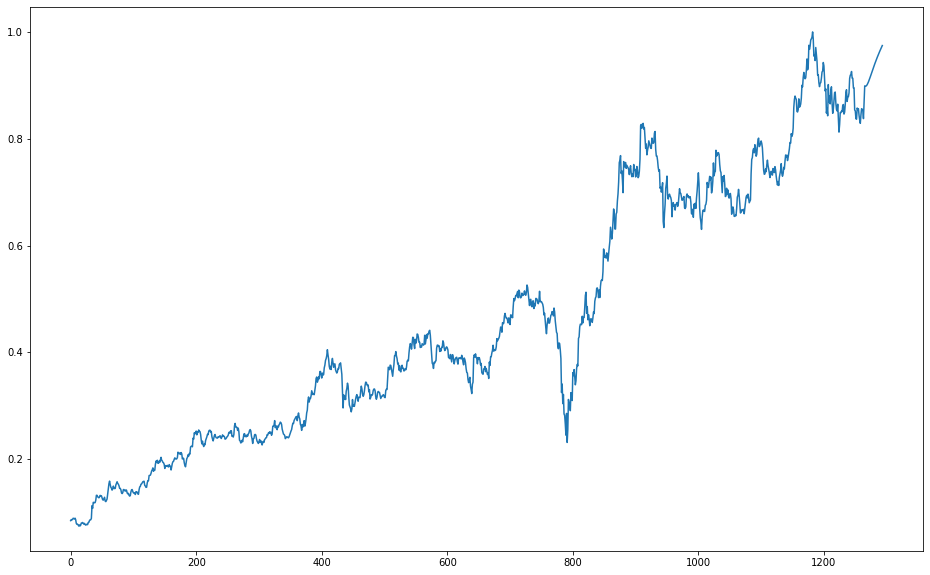

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df3[1200:])

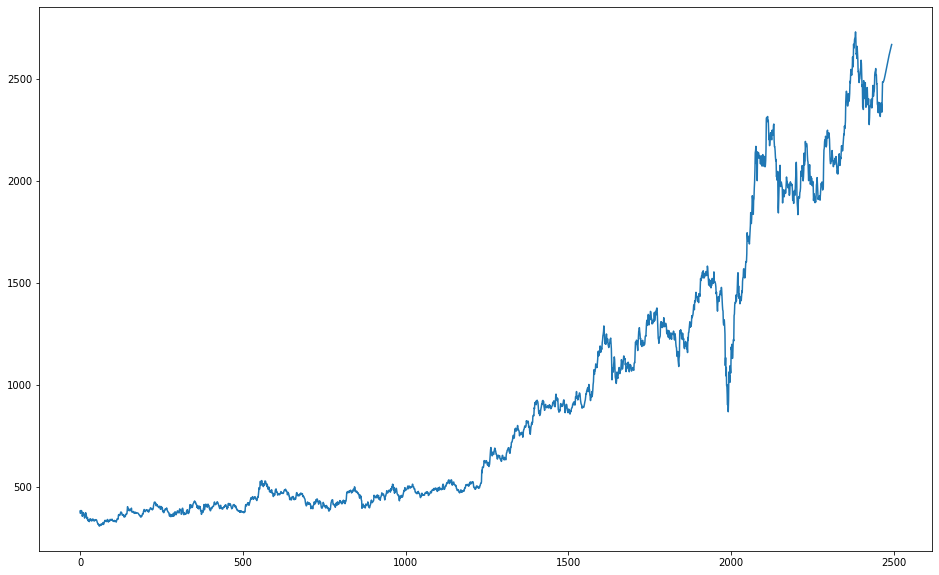

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df3)